### Instalação de bibliotecas
Download market data from Yahoo! Finance's API: https://pypi.org/project/yfinance/

**Notícias relevantes sobre o tema:**

- *Suno Notícias - Quem deve se beneficiar do Plano Nova Indústria Brasil?*: [Leia mais](https://www.suno.com.br/noticias/weg-wege3-embraer-embr3-analistas-destacam-beneficiar-plano-nova-industria-va/)
- *Infomoney - Perspectivas Nova Indústria Brasil*: [Leia mais](https://www.infomoney.com.br/politica/perspectivas-da-nova-industria-no-brasil-setor-busca-modernizacao/)

In [1]:
#!pip install yfinance
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
# Importando as bibliotecas necessárias

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Empresas que serão analisadas do setor Industrial:

**Nomes das empresas a serem analisadas**

- Vale (Mineração e metais)
- CSN (Siderurgia e mineração)
- Gerdau (Siderurgia)
- Usiminas (Siderurgia)
- Embraer (Aeronáutica)
- Tupy (Fundição de blocos de motor e componentes automotivos)
- Vamos (Locação de veículos pesados)
- Marcopolo (Fabricação de ônibus)
- Mahle (Fabricação de ônibus)
- Mills (Locação de equipamentos e engenharia)
- WEGE (Equipamentos industriais)
- Petrobras(Energia e petróleo)
- Braskem (Petroquímica)
- Suzano (Papel e celulose)
- Klabin (Papel e embalagens)


#### Obtendo os Indicadores Financeiros de 2023, 2022, 2021 e 2020 das empresas citadas

In [3]:
# Funções para calcular Indicadores Financeiros (KPIs)
# ROE (%)
def calculate_roe(equity, net_income):
    return (net_income / equity) * 100
#ROA (%)
def calculate_roa(total_assets, net_income):
    return (net_income / total_assets) * 100

def calculate_debt_to_equity(total_debt, total_equity):
    return (total_debt / total_equity) * 100

def calculate_ebitda_margin(ebitda, revenue):
    return (ebitda / revenue) * 100

def calculate_net_margin(net_income, revenue):
    return (net_income / revenue) * 100

def calculate_current_ratio(current_assets, current_liabilities):
    return (current_assets / current_liabilities) * 100

def calculate_debt_to_ebitda(total_debt, ebitda):
    return (total_debt / ebitda) * 100

def calculate_debt_to_equity_ratio(total_debt, equity):
    return (total_debt / equity) * 100

# Lista de tickers e nomes das empresas
companies = {
    'VALE3.SA': 'Vale',         # Mineração e metais
    'CSNA3.SA': 'CSN',          # Siderurgia e mineração.
    'GGBR4.SA': 'Gerdau',       # Siderurgia
    'USIM5.SA': 'Usiminas',     # Siderurgia
    'EMBR3.SA': 'Embraer',      # Aeronáutica
    'TUPY3.SA': 'Tupy',         # Fundição de blocos de motor e componentes automotivos
    'VAMO3.SA': 'Vamos',        # Locação de veículos pesados
    'POMO3.SA': 'Marcopolo',    # Fabricação de ônibus 
    'LEVE3.SA': 'Mahle',        # Fabricação de ônibus 
    'MILS3.SA': 'Mills',        # Locação de equipamentos e engenharia
    'WEGE3.SA': 'WEGE',         # Equipamentos industriais
    'PETR4.SA': 'Petrobras',    # Energia e petróleo
    'BRKM5.SA': 'Braskem',      # Petroquímica
    'SUZB3.SA': 'Suzano',       # Papel e celulose
    'KLBN11.SA': 'Klabin'       # Papel e embalagens
}

# Função para calcular KPIs de um ticker específico
def get_kpis(ticker, company_name):
    stock = yf.Ticker(ticker)
    
    # Obtendo dados financeiros trimestrais
    financials = stock.financials.T
    balance_sheet = stock.balance_sheet.T
    cashflow = stock.cashflow.T
    
    # Filtrando os dados necessários
    net_income = financials['Net Income']
    total_equity = balance_sheet['Stockholders Equity']
    total_assets = balance_sheet['Total Assets']
    #total_debt = balance_sheet['Total Liabilities Net Minority Interest']
    ebitda = financials.get('EBITDA', pd.Series())  # 'EBITDA' pode não estar disponível
    revenue = financials.get('Total Revenue', pd.Series())  # 'Total Revenue' pode não estar disponível

    current_assets = balance_sheet.get('Current Assets', pd.Series())  # 'Total Current Assets' pode não estar disponível
    current_liabilities = balance_sheet.get('Current Liabilities', pd.Series())  # 'Total Current Liabilities' pode não estar disponível
    
    total_debt = balance_sheet['Total Debt']
    total_cash = balance_sheet['Cash And Cash Equivalents']
    
    # Ajustando o índice de datas para o formato correto
    net_income.index = pd.to_datetime(net_income.index)
    total_equity.index = pd.to_datetime(total_equity.index)
    total_assets.index = pd.to_datetime(total_assets.index)
    total_debt.index = pd.to_datetime(total_debt.index)
    ebitda.index = pd.to_datetime(ebitda.index)
    revenue.index = pd.to_datetime(revenue.index)

    current_assets.index = pd.to_datetime(current_assets.index)
    current_liabilities.index = pd.to_datetime(current_liabilities.index)  

    total_cash.index = pd.to_datetime(total_debt.index)

    # Resample mensal
    net_income_monthly = net_income.resample('M').mean()
    total_equity_monthly = total_equity.resample('M').mean()
    total_assets_monthly = total_assets.resample('M').mean()
    total_debt_monthly = total_debt.resample('M').mean()
    ebitda_monthly = ebitda.resample('M').mean()
    revenue_monthly = revenue.resample('M').mean()

    current_assets_monthly = current_assets.resample('M').mean()
    current_liabilities_monthly = current_liabilities.resample('M').mean()    

    total_cash_monthly = total_cash.resample('M').mean()  

    # Calculando KPIs mensais
    kpis_monthly = pd.DataFrame({
        'Net Income': net_income_monthly,
        'Total Equity': total_equity_monthly,
        'Total Assets': total_assets_monthly,
        'Total Debt': total_debt_monthly,
        'EBITDA': ebitda_monthly,
        'Revenue': revenue_monthly,
        'Current Assets': current_assets_monthly,
        'Current Liabilities': current_liabilities_monthly,       
        'Total Cash': total_cash_monthly
    }).dropna()

    kpis_monthly['ROE (%)'] = calculate_roe(kpis_monthly['Total Equity'], kpis_monthly['Net Income'])
    kpis_monthly['ROA (%)'] = calculate_roa(kpis_monthly['Total Assets'], kpis_monthly['Net Income'])
    kpis_monthly['Debt to Equity (%)'] = calculate_debt_to_equity(kpis_monthly['Total Debt']-kpis_monthly['Total Cash'], kpis_monthly['Total Equity'])
    kpis_monthly['EBITDA Margin (%)'] = calculate_ebitda_margin(kpis_monthly['EBITDA'], kpis_monthly['Revenue'])
    kpis_monthly['Net Margin (%)'] = calculate_net_margin(kpis_monthly['Net Income'], kpis_monthly['Revenue'])
    kpis_monthly['Debt to EBITDA (%)'] = calculate_debt_to_ebitda(kpis_monthly['Total Debt']-kpis_monthly['Total Cash'], kpis_monthly['EBITDA'])
    kpis_monthly['Current Ratio'] = calculate_current_ratio(kpis_monthly['Current Assets'], kpis_monthly['Current Liabilities'])

    
    kpis_monthly['Ticker'] = ticker
    kpis_monthly['Empresa'] = company_name
    kpis_monthly.reset_index(inplace=True)
    kpis_monthly.rename(columns={'index': 'Data'}, inplace=True)

    return kpis_monthly[['Data', 'Ticker', 'Empresa', 'ROE (%)', 'EBITDA Margin (%)', 'Debt to Equity (%)', 'Debt to EBITDA (%)', 'Current Ratio', 'Net Margin (%)']]

# Criar um DataFrame vazio para armazenar os resultados
kpis_df = pd.DataFrame()

# Calculando e armazenando KPIs para cada ticker
for ticker, company_name in companies.items():
    kpis_data = get_kpis(ticker, company_name)
    kpis_df = pd.concat([kpis_df, kpis_data], ignore_index=True)

kpis_df.head()

C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\789741140.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  net_income_monthly = net_income.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\789741140.py:84: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_equity_monthly = total_equity.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\789741140.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_assets_monthly = total_assets.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\789741140.py:86: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_debt_monthly = total_debt.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\789741140.py:87: FutureWarning: 'M' is deprecated and will be r

,Data,Ticker,Empresa,ROE (%),EBITDA Margin (%),Debt to Equity (%),Debt to EBITDA (%),Current Ratio,Net Margin (%)
0,2020-12-31,VALE3.SA,Vale,13.655439,31.766342,17.731647,50.453749,167.212553,12.3429
1,2021-12-31,VALE3.SA,Vale,65.110815,62.617886,15.89696,16.057196,147.124622,41.181975
2,2022-12-31,VALE3.SA,Vale,52.382413,54.510824,29.835225,44.779679,111.770211,42.856817
3,2023-12-31,VALE3.SA,Vale,20.230101,37.239135,33.420339,84.755784,127.601501,19.105399
4,2020-12-31,CSNA3.SA,CSN,38.274209,32.23525,260.819345,266.800458,158.812147,12.620717


#### Análise visual dos dados obtidos

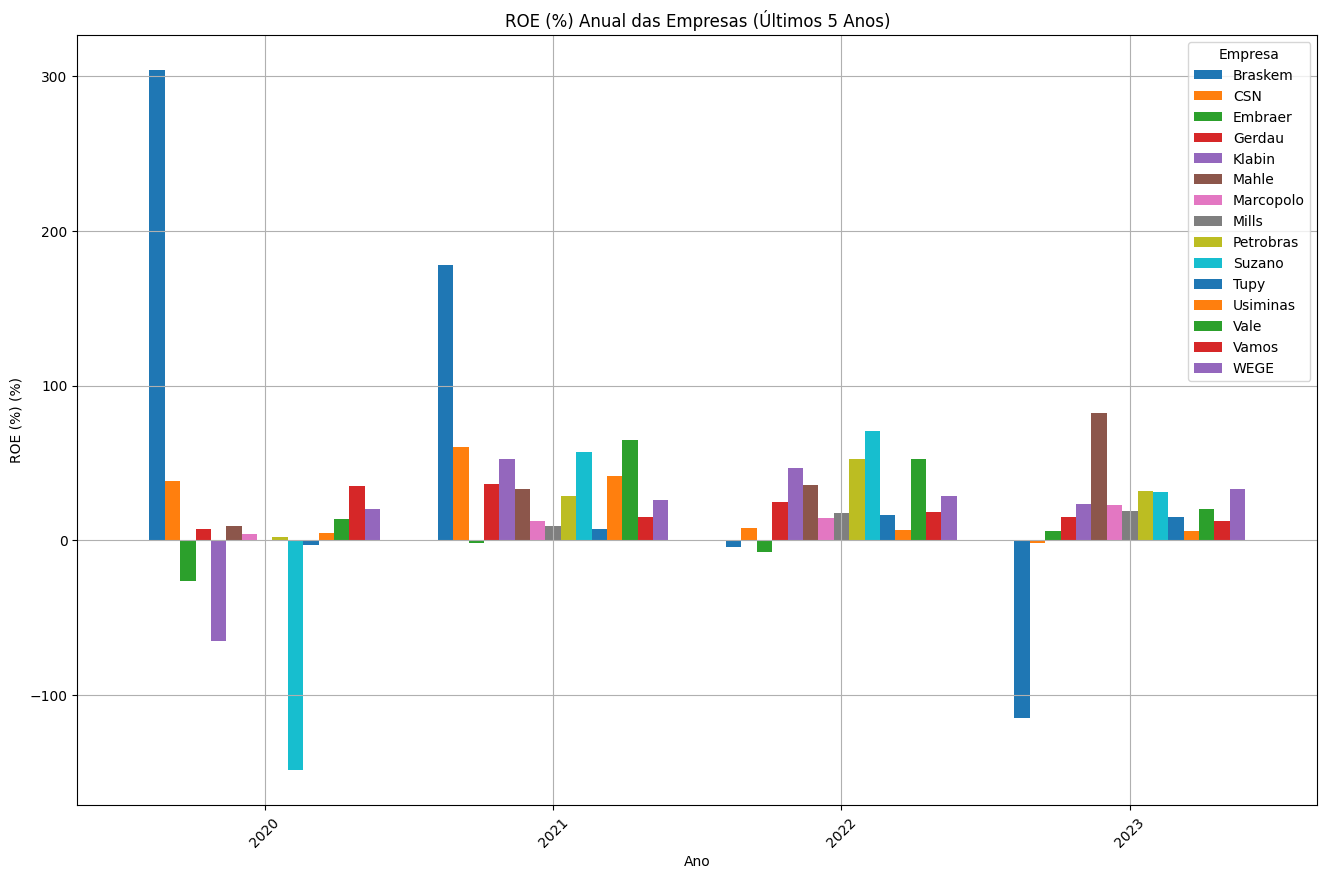

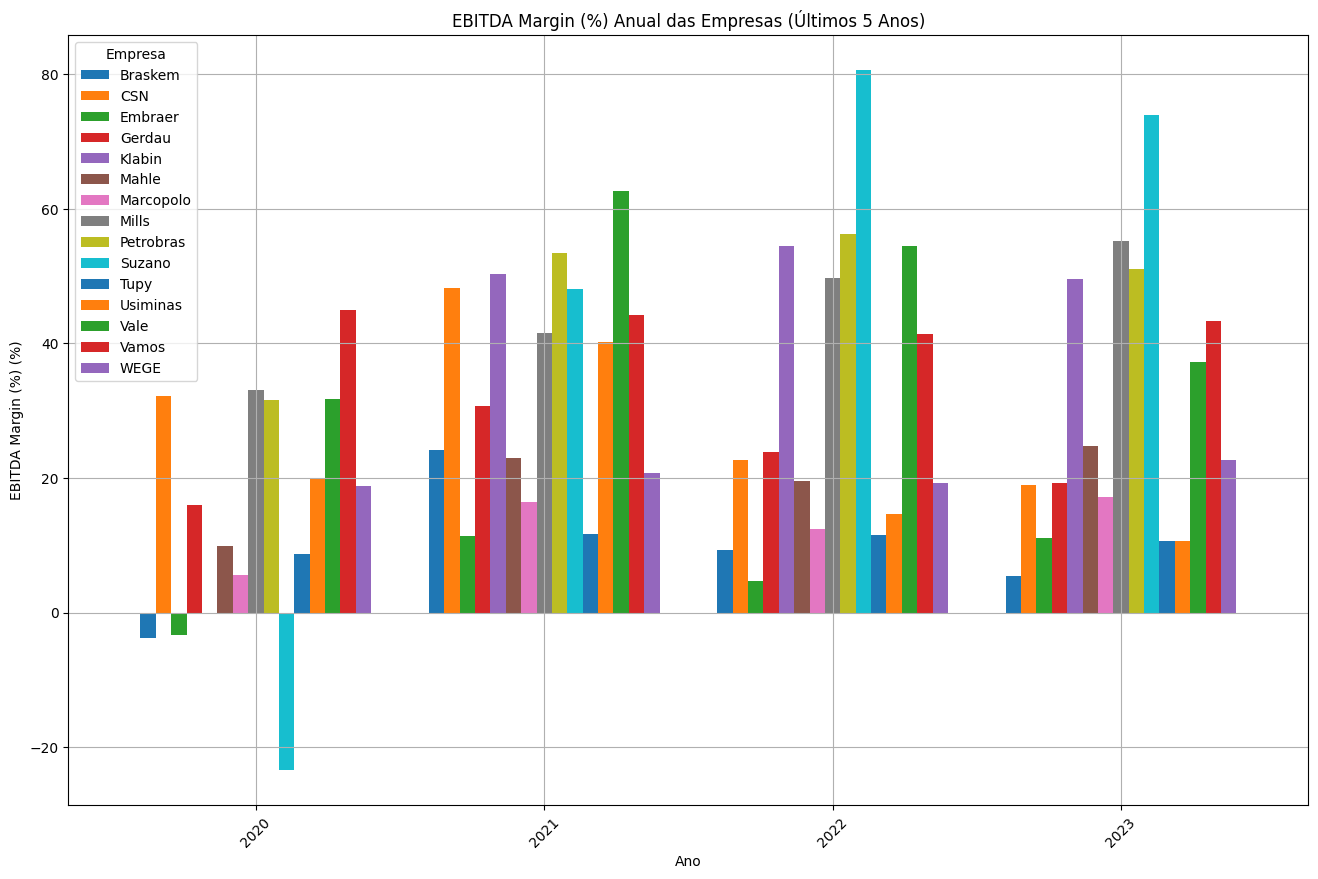

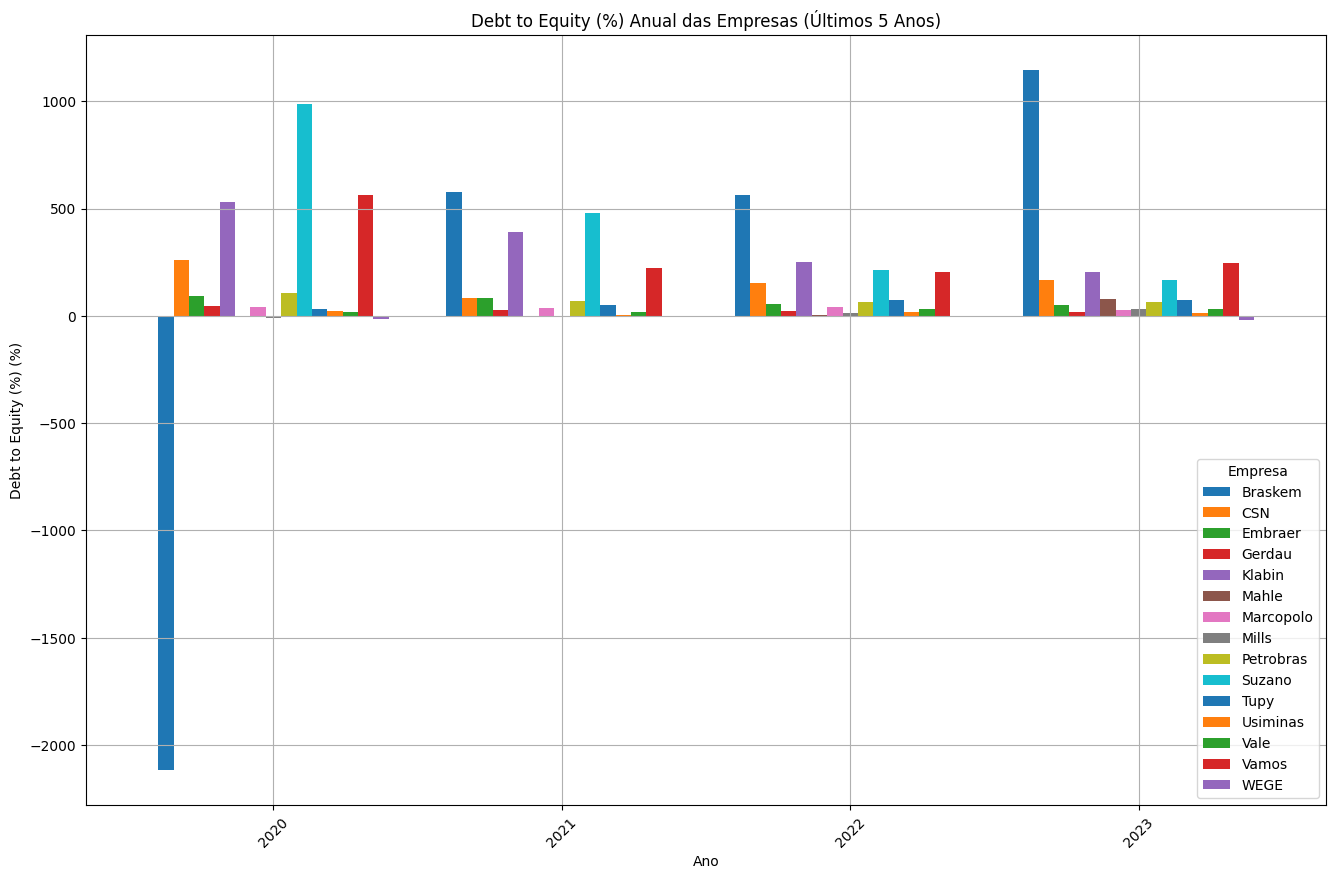

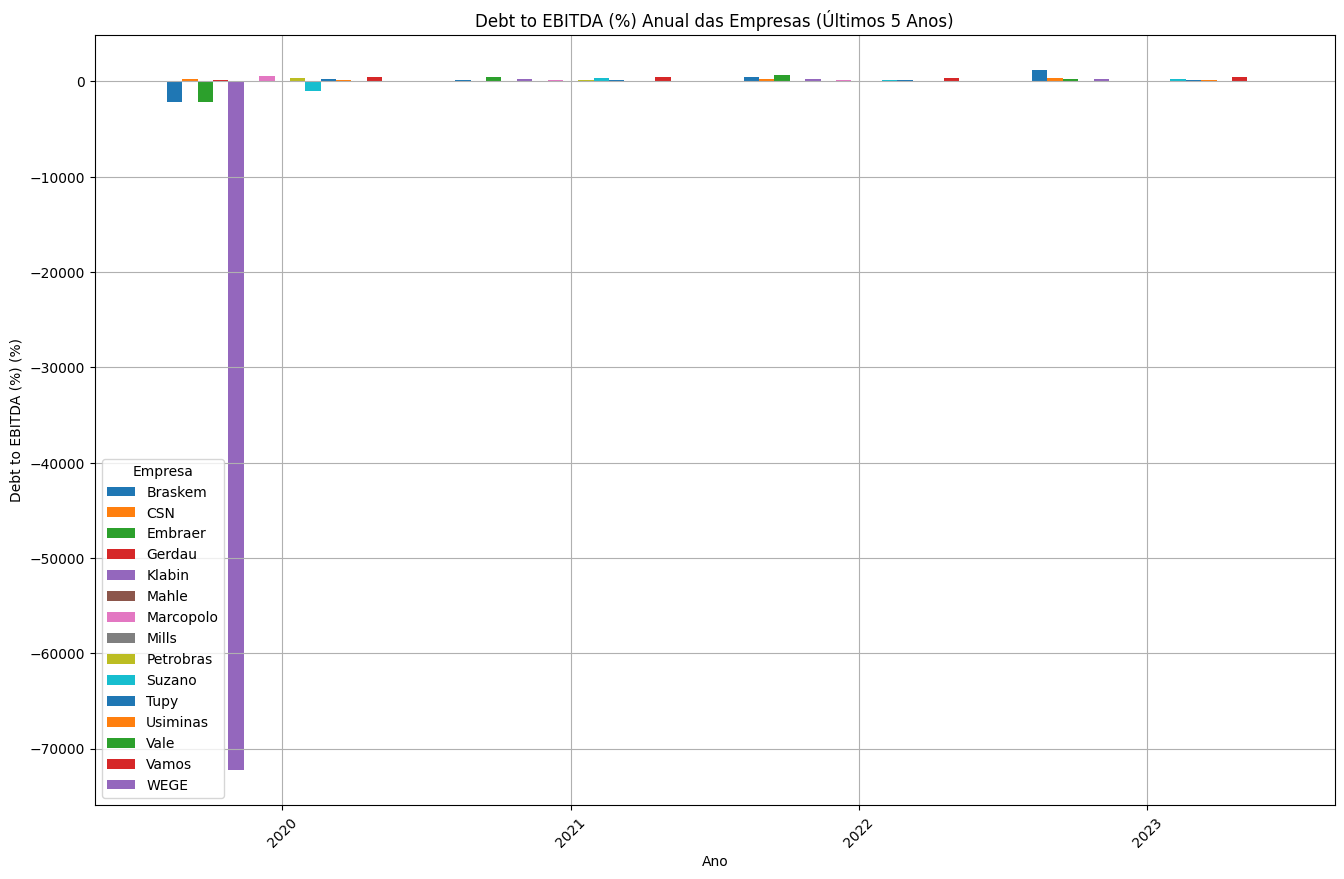

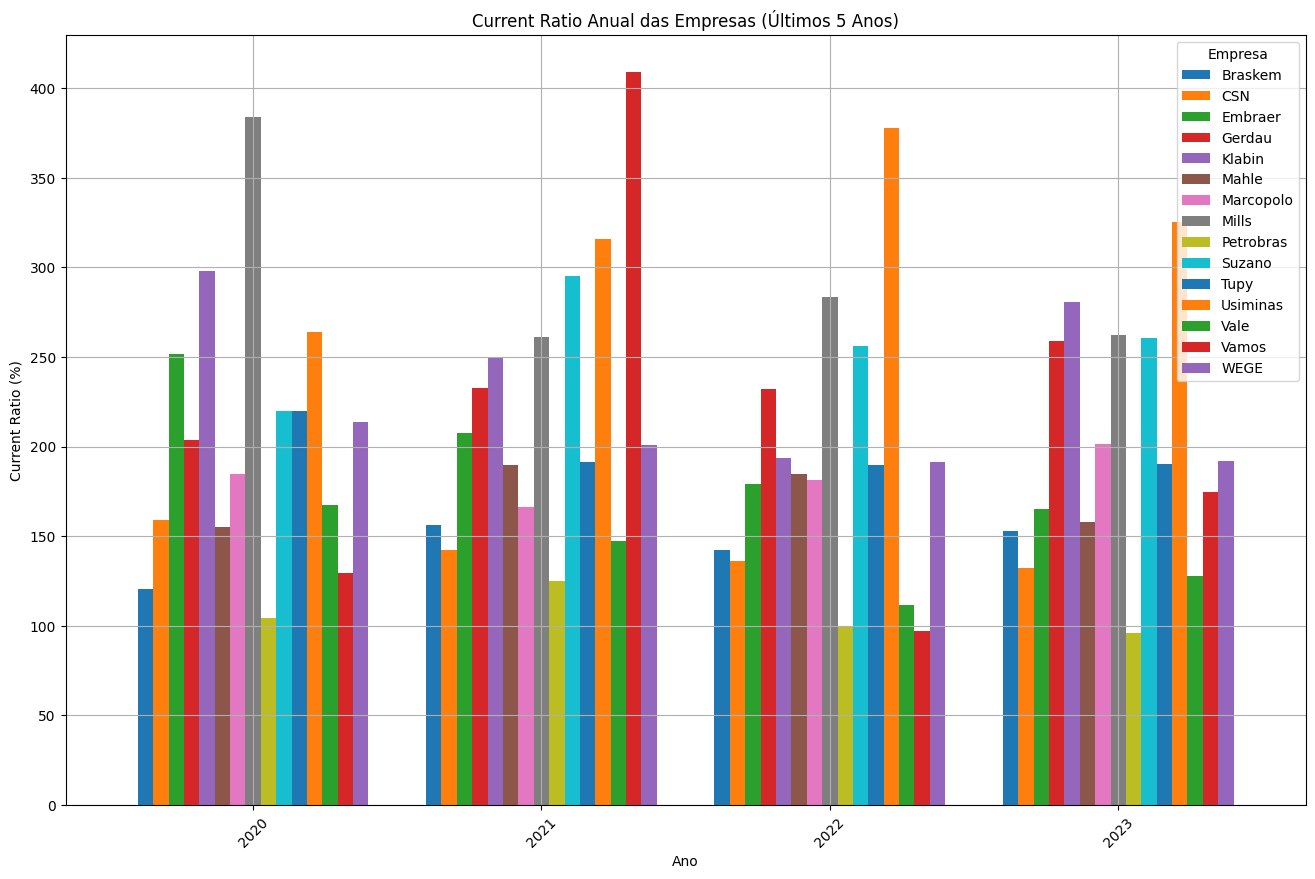

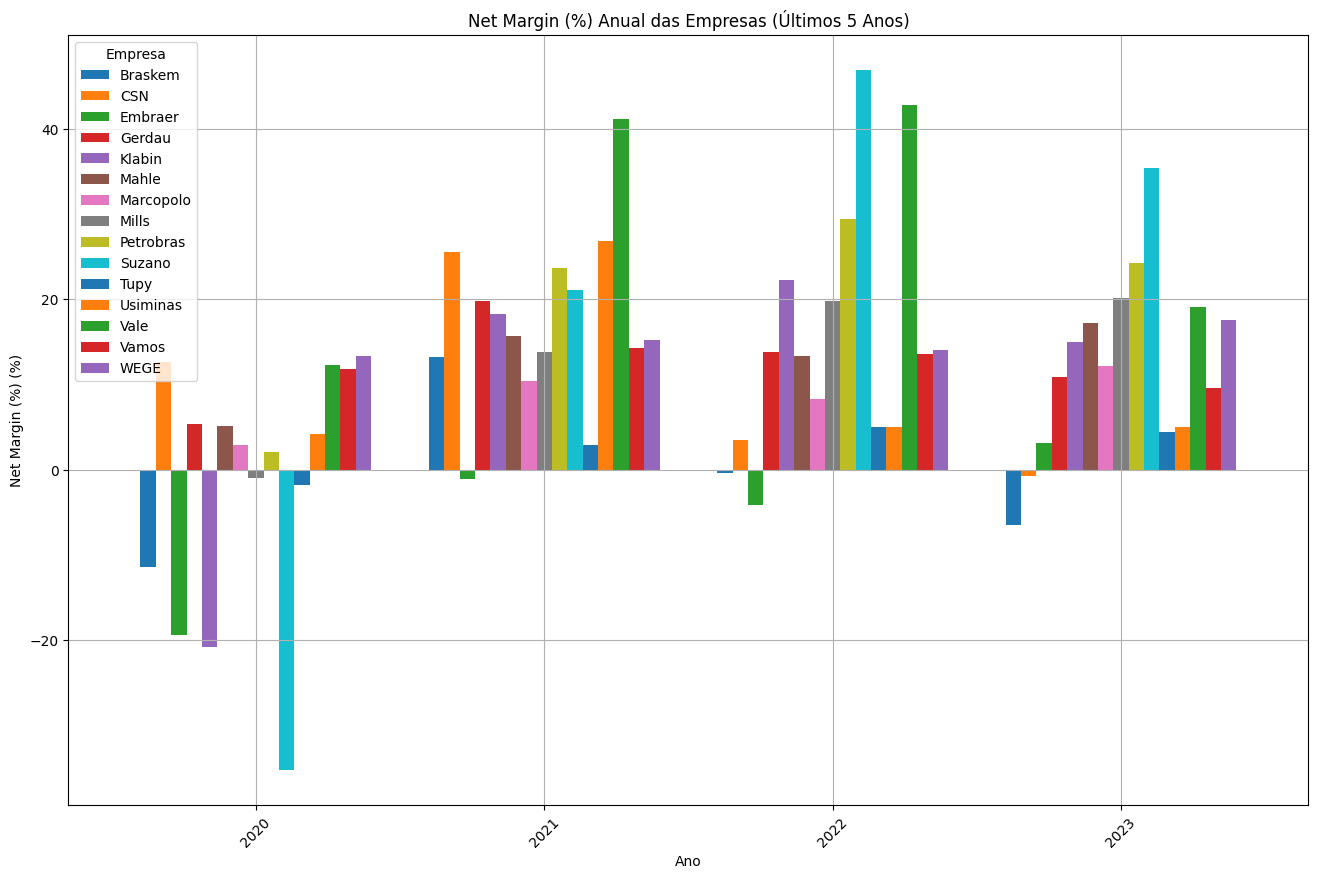

In [4]:
# Função para plotar gráficos de KPIs
def plot_kpis(kpis_df, kpi_name):
    kpis_df['Ano'] = kpis_df['Data'].dt.year
    kpis_df = kpis_df[kpis_df['Ano'] >= (pd.Timestamp.now().year - 5)]  # Filtrando para os últimos 5 anos
    kpi_annual = kpis_df.groupby(['Ano', 'Empresa'])[kpi_name].mean().unstack()

    kpi_annual.plot(kind='bar', figsize=(16, 10), width=0.8)
    plt.title(f'{kpi_name} Anual das Empresas (Últimos 5 Anos)')
    plt.xlabel('Ano')
    plt.ylabel(f'{kpi_name} (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Empresa')
    plt.grid(True)
    plt.show()

# Plotando gráficos para cada KPI
plot_kpis(kpis_df, 'ROE (%)')
plot_kpis(kpis_df, 'EBITDA Margin (%)')
plot_kpis(kpis_df, 'Debt to Equity (%)')
plot_kpis(kpis_df, 'Debt to EBITDA (%)')
plot_kpis(kpis_df, 'Current Ratio')
plot_kpis(kpis_df, 'Net Margin (%)')

#### Clusterizando empresas por Indicadores Financeiros

In [5]:
# Filtrar para o ano de 23/22/21
kpis_df_2023 = kpis_df[kpis_df['Data'].dt.year.isin([2021, 2022, 2023])]
# Peso 2 - Flag de Margem Líquida (%) acima de 9%
kpis_df_2023['FL_NetMargin'] = ((kpis_df_2023['Net Margin (%)'] > 9)).astype(int) * 2
# Peso 3 - Flag de ROE (%) abaixo de 10%
kpis_df_2023['FL_ROE'] = ((kpis_df_2023['ROE (%)'] > 10)).astype(int) * 3
# Flag de Liquidez Corrente acima de 1
kpis_df_2023['FL_CurrentRatio'] = ((kpis_df['Current Ratio'] > 1)).astype(int) 
# Flag de DivLiq/PatrimLiq abaixo de 1
kpis_df_2023['FL_DebtEquity'] = ((kpis_df['Debt to Equity (%)'] < 1)).astype(int) 
# Flag de DivLiq/EBITDA abaixo de 3
kpis_df_2023['FL_DebtEBITDA'] = ((kpis_df['Debt to EBITDA (%)'] < 1)).astype(int) 
# Somando as Flags
kpis_df_2023['FL_Total'] = kpis_df_2023[['FL_NetMargin', 'FL_ROE', 'FL_CurrentRatio', 'FL_DebtEquity', 'FL_DebtEBITDA']].sum(axis=1)

# Filtrando as empresas e as notas de 23/22/21
kpis_df_2023 = kpis_df_2023[['Empresa','FL_Total']]
# Somando as notas de todos os anos
kpis_df_agrupado = kpis_df_2023.groupby('Empresa', as_index=False)['FL_Total'].sum()
# Ordenando as Flags
kpis_df_agrupado = kpis_df_agrupado.sort_values(by='FL_Total', ascending=False)
kpis_df_agrupado


C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\1361833624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpis_df_2023['FL_NetMargin'] = ((kpis_df_2023['Net Margin (%)'] > 9)).astype(int) * 2
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\1361833624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpis_df_2023['FL_ROE'] = ((kpis_df_2023['ROE (%)'] > 10)).astype(int) * 3
C:\Users\DanaK\AppData\Local\Temp\ipykernel_5656\1361833624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Empresa,FL_Total
14,WEGE,24
5,Mahle,20
3,Gerdau,18
9,Suzano,18
12,Vale,18
8,Petrobras,18
4,Klabin,18
13,Vamos,18
7,Mills,17
6,Marcopolo,16


#### Visualizando empresas clusterizadas com os Indicadores Financeiros

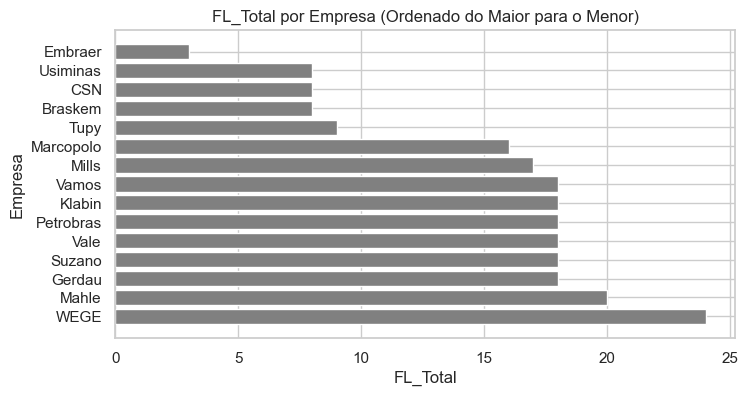

In [101]:
# Mapear os ramos e cores
ramo_cores = {
    'Mineração e metais': 'grey',
    'Siderurgia e mineração': 'grey', #silver, grey
    'Siderurgia': 'grey',
    'Aeronáutica': 'grey',
    'Fundição': 'grey',
    'Locação de veículos pesados': 'grey',
    'Fabricação de ônibus': 'grey',
    'Locação de equipamentos e engenharia': 'grey',
    'Equipamentos industriais': 'grey',
    'Energia e petróleo': 'grey',
    'Petroquímica': 'grey',
    'Papel e celulose': 'grey',
    'Papel e embalagens': 'grey'
}

# Adicionar uma coluna de ramo ao DataFrame
kpis_df_agrupado['Ramo'] = kpis_df_agrupado['Empresa'].map({
    'Vale': 'Mineração e metais',
    'CSN': 'Siderurgia e mineração',
    'Gerdau': 'Siderurgia',
    'Usiminas': 'Siderurgia',
    'Embraer': 'Aeronáutica',
    'Tupy': 'Fundição',
    'Vamos': 'Locação de veículos pesados',
    'Marcopolo': 'Fabricação de ônibus',
    'Mahle': 'Fabricação de ônibus',
    'Mills': 'Locação de equipamentos e engenharia',
    'WEGE': 'Equipamentos industriais',
    'Petrobras': 'Energia e petróleo',
    'Braskem': 'Petroquímica',
    'Suzano': 'Papel e celulose',
    'Klabin': 'Papel e embalagens'
})

# Mapear as cores dos ramos
kpis_df_agrupado['Cor'] = kpis_df_agrupado['Ramo'].map(ramo_cores)

# Ordenar o DataFrame pelo 'FL_Total' do maior para o menor
kpis_df_ordenado = kpis_df_agrupado.sort_values(by='FL_Total', ascending=False)

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 4))

# Criar o gráfico de barras com as cores baseadas no ramo
bars = ax.barh(kpis_df_ordenado['Empresa'], kpis_df_ordenado['FL_Total'], color=kpis_df_ordenado['Cor'])

# Adicionar rótulos e título
ax.set_xlabel('FL_Total')
ax.set_ylabel('Empresa')
ax.set_title('FL_Total por Empresa (Ordenado do Maior para o Menor)')

# Exibir o gráfico
plt.show()


#### Filtrando as empresas para analisar as 10 melhores no período

In [88]:
# Filtrar para o ano de 2023
kpis_df_2023 = kpis_df[kpis_df['Data'].dt.year.isin([2023])]

empresas_desejadas = ['WEGE', 'Mahle', 'Gerdau', 'Suzano', 'Vale', 'Petrobras', 'Klabin', 'Vamos', 'Mills', 'Marcopolo']

kpis_df_filtrado = kpis_df_2023[kpis_df_2023['Empresa'].isin(empresas_desejadas)]
kpis_df_filtrado

,Data,Ticker,Empresa,ROE (%),EBITDA Margin (%),Debt to Equity (%),Debt to EBITDA (%),Current Ratio,Net Margin (%)
3,2023-12-31,VALE3.SA,Vale,20.230101,37.239135,33.420339,84.755784,127.601501,19.105399
11,2023-12-31,GGBR4.SA,Gerdau,15.290918,19.202798,18.733086,69.444886,258.741169,10.885014
27,2023-12-31,VAMO3.SA,Vamos,12.395405,43.342006,245.375209,440.528213,174.589985,9.645234
31,2023-12-31,POMO3.SA,Marcopolo,23.018516,17.117457,26.855654,83.235446,201.528909,12.212066
35,2023-12-31,LEVE3.SA,Mahle,82.190494,24.705352,76.195738,64.712731,157.939301,17.245337
39,2023-12-31,MILS3.SA,Mills,19.047182,55.209486,30.900391,59.276515,262.211525,20.172658
43,2023-12-31,WEGE3.SA,WEGE,33.05064,22.67103,-17.855373,-42.02111,192.182787,17.633954
47,2023-12-31,PETR4.SA,Petrobras,31.665882,51.065824,63.465381,95.366758,95.821028,24.298646
55,2023-12-31,SUZB3.SA,Suzano,31.514824,73.943471,167.970352,255.371268,260.689204,35.428611
59,2023-12-31,KLBN11.SA,Klabin,23.258607,49.50429,204.622006,265.683743,280.766086,14.949931


C:\Users\DanaK\AppData\Local\Temp\ipykernel_20356\568469277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Empresa', y='ROE (%)', data=kpis_df_filtrado, ax=axs[0, 0], palette="Blues_d")
C:\Users\DanaK\AppData\Local\Temp\ipykernel_20356\568469277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Empresa', y='Net Margin (%)', data=kpis_df_filtrado, ax=axs[0, 1], palette="Greens_d")
C:\Users\DanaK\AppData\Local\Temp\ipykernel_20356\568469277.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Empresa', y='EBITDA Margin (%)', d

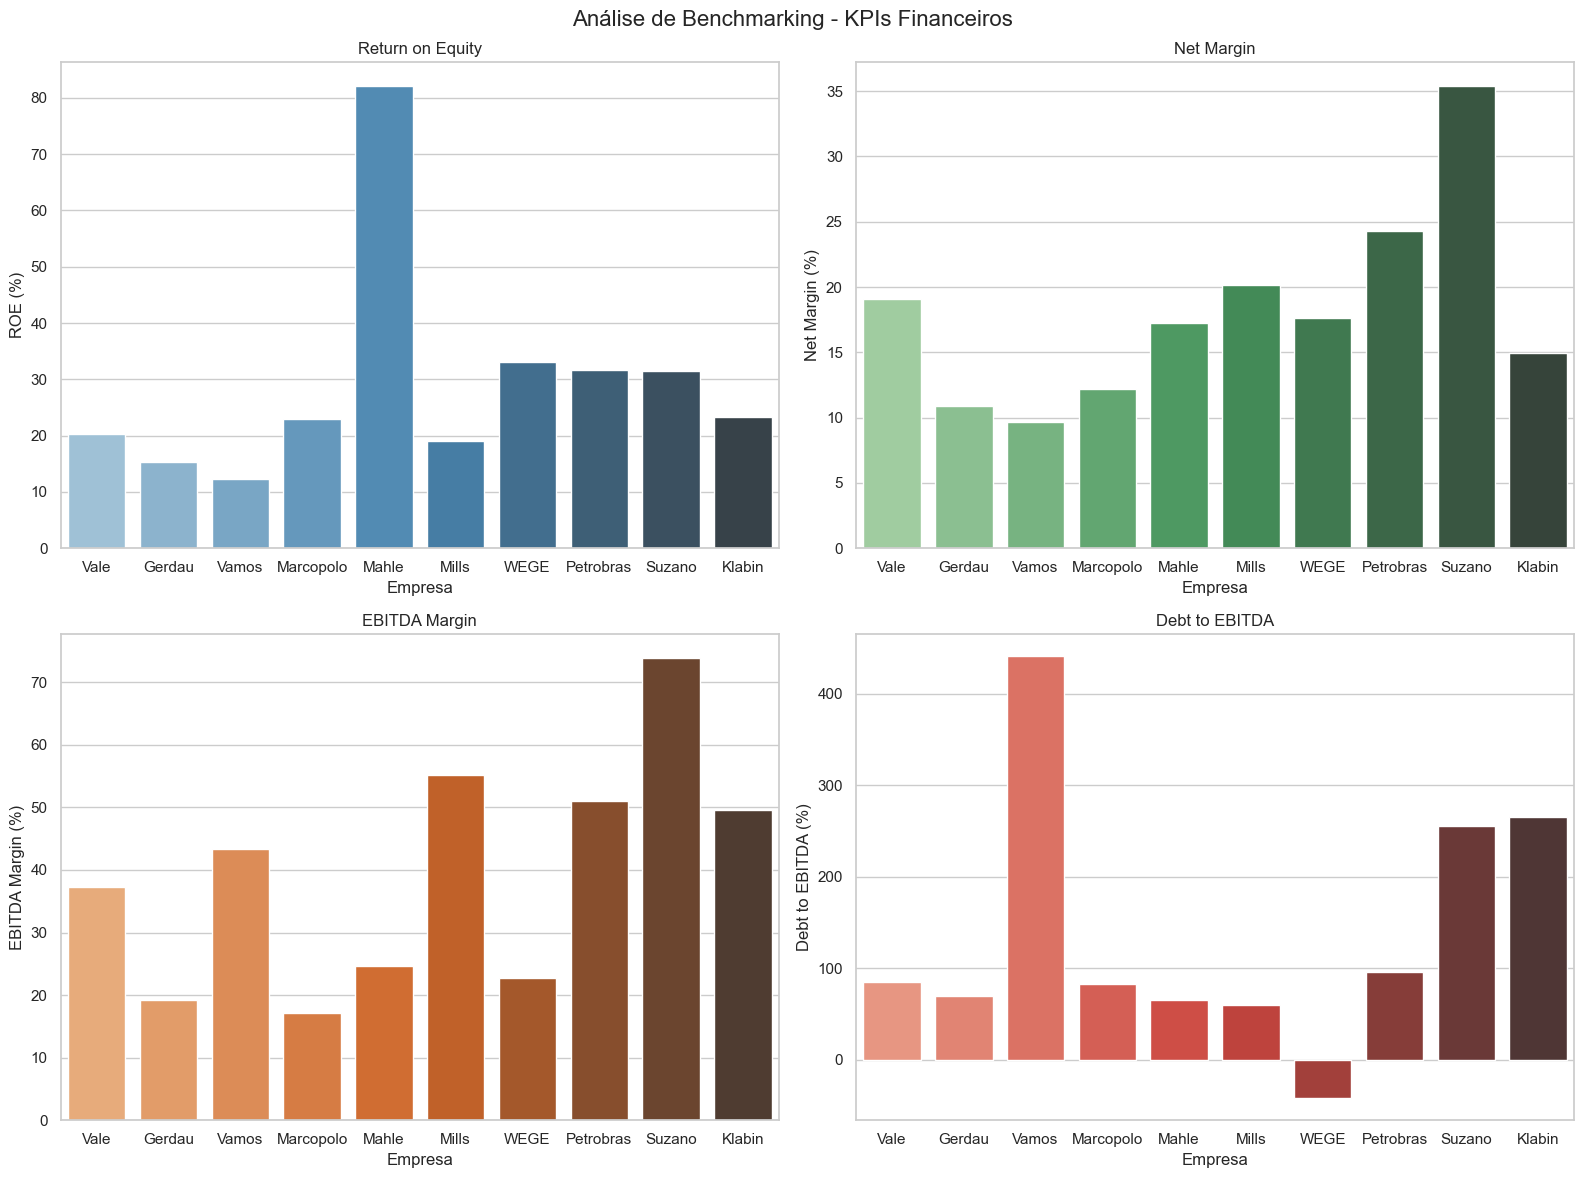

In [99]:
# Plotando os KPIs em gráficos de barras
sns.set(style="whitegrid")

# Configurando gráficos para cada KPI
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Benchmarking - KPIs Financeiros', fontsize=16)

# ROE
sns.barplot(x='Empresa', y='ROE (%)', data=kpis_df_filtrado, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Return on Equity')

# Net Margin
sns.barplot(x='Empresa', y='Net Margin (%)', data=kpis_df_filtrado, ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title('Net Margin')

# EBITDA Margin
sns.barplot(x='Empresa', y='EBITDA Margin (%)', data=kpis_df_filtrado, ax=axs[1, 0], palette="Oranges_d")
axs[1, 0].set_title('EBITDA Margin')

# Debt to EBITDA
sns.barplot(x='Empresa', y='Debt to EBITDA (%)', data=kpis_df_filtrado, ax=axs[1, 1], palette="Reds_d")
axs[1, 1].set_title('Debt to EBITDA')

# Ajustando layout
plt.tight_layout()
plt.show()
